In [9]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import numpy as np
import tensorflow as tf
import strawberryfields as sf
from strawberryfields.ops import *
import pickle
import random as rd
import matplotlib.pyplot as plt
import warnings


from collections.abc import Callable
from uq_new import get_data, train_memristor, predict_memristor, quartic_data, plot_predictions

tf.get_logger().setLevel('ERROR')
warnings.filterwarnings("ignore")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
rd.seed(42)

In [8]:
# Define memory depth 
memory_depth = 3

# Generate data using get_data function
X_train, y_train, X_test, y_test, _ = get_data(n_data=100, sigma_noise_1=0.0, datafunction=quartic_data)

# Train the memristor model
res_mem, phase1, phase3, memristor_weight = train_memristor(X_train, y_train, memory_depth)

Loss at step 1: 20.843863092422268
Loss at step 2: 17.90994089989416
Loss at step 3: 15.164649582290501
Loss at step 4: 12.679838609895928
Loss at step 5: 10.459730609857097
Loss at step 6: 8.50338549314814
Loss at step 7: 6.805276856868209
Loss at step 8: 5.356727231152739
Loss at step 9: 4.362266106038204
Loss at step 10: 3.478615829409704
Loss at step 11: 2.7094813261962543
Loss at step 12: 2.058572078035394
Loss at step 13: 1.526783838935322
Loss at step 14: 1.1118531769242728
Loss at step 15: 0.807988174558217
Loss at step 16: 0.6058395170213036
Loss at step 17: 0.49274275081391866
Loss at step 18: 0.47660071787672875
Loss at step 19: 0.4760656587607068
Loss at step 20: 0.4774541066646563
Loss at step 21: 0.4803121405581958
Loss at step 22: 0.4841899269835877
Loss at step 23: 0.48864734490064576
Loss at step 24: 0.4933069555570617
Loss at step 25: 0.49782617403899276
Loss at step 26: 0.5019594760925716
Loss at step 27: 0.5054879859349158
Loss at step 28: 0.5082737164174718
Loss at

In [10]:
 # Predict using the trained model
predictions, targets, predictive_uncertainty = predict_memristor(X_test, y_test, memory_depth, phase1, phase3, memristor_weight)


Predicting on test data...
Sample 1/20
Sample 2/20
Sample 3/20
Sample 4/20
Sample 5/20
Sample 6/20
Sample 7/20
Sample 8/20
Sample 9/20
Sample 10/20
Sample 11/20
Sample 12/20
Sample 13/20
Sample 14/20
Sample 15/20
Sample 16/20
Sample 17/20
Sample 18/20
Sample 19/20
Sample 20/20


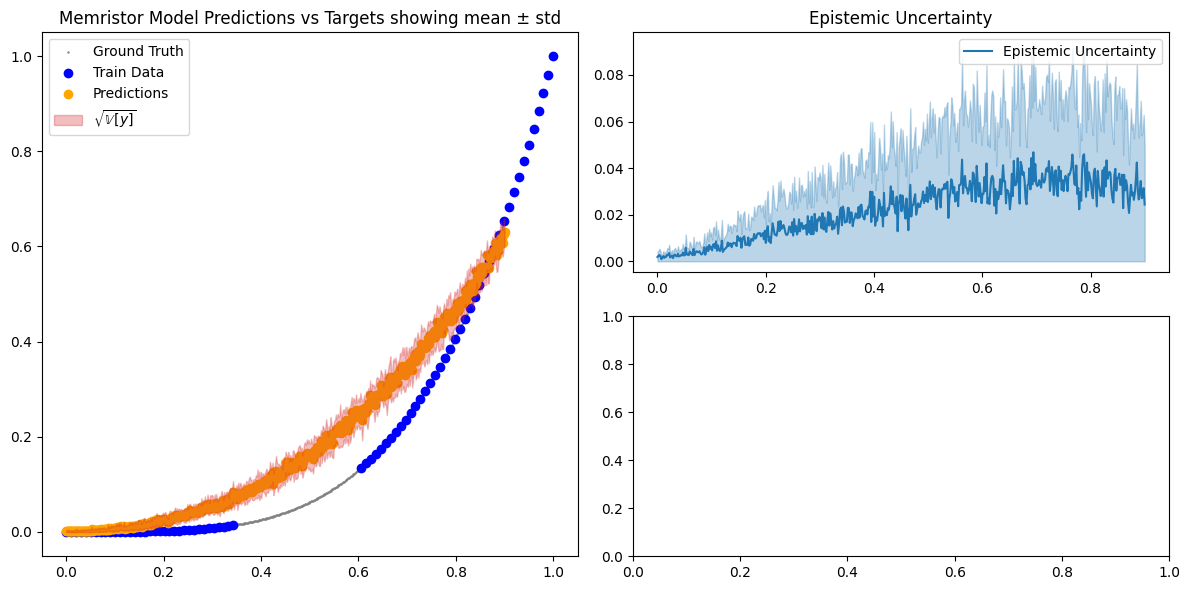

In [11]:
 # Ensure predictions and X_test have the same length
assert len(predictions) == len(X_test), "Predictions and X_test must have the same length"

# Plotting the results
plot_predictions(
    X_train.numpy(), y_train.numpy(), X_test.numpy(), y_test.numpy(),
    predictions, pred_std=predictive_uncertainty, epistemic=predictive_uncertainty,
    title="Memristor Model Predictions vs Targets"
    )